In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date

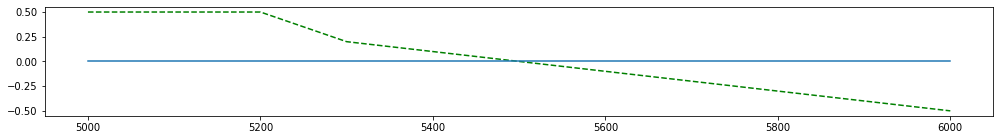

In [4]:
# p15 4g
x = np.arange(5000,6100,100)
# y = np.random.randn(len(x))
y = [.5, .5, .5, .2, .1, 0, -.1, -.2, -.3, -.4, -.5]
plt.figure(figsize=(17,2))
plt.plot(x,y, 'g--')
plt.plot(x, np.zeros(len(y)))

In [5]:
def t(strike, curr_price):
    if strike >= curr_price:
        prices = np.arange(curr_price*-1.5, curr_price*10)
    else: 
        prices = np.arange(strike*-1.5, strike*10)
    print(prices)
    
t(1,2)

t(2,1)

[-1.5 -0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5]
[-1.5 -0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5]


In [10]:
def call_long_pl(price, strike, premium):
    if price <= strike:
        return - premium
    return price - strike - premium

def call_long_maxgain():
    return np.inf

def call_long_maxloss(premium):
    return premium

def call_short_pl(price, strike, premium):
    if price <= strike:
        return premium
    return strike - price + premium

def call_short_maxgain(premium):
    return premium

def call_short_maxloss():
    return np.inf

def call_value_at_exp(price, strike, premium):
    if price <= strike:
        return 0
    return price - strike

def call_pl(strike, premium, und_price, cash_multiplier, stl_price=False, plot=False, figsize=(17,2)):
    
    # basics
    breakeven = strike + premium
    basis = breakeven - strike
    absbasis = np.abs(basis)
    print(basis)
    
    delta = (und_price-strike)/strike
    delta_beven = (und_price-breakeven)/breakeven
    cash_value = premium * cash_multiplier
    long_profit = None
    short_profit = None
    
    if stl_price is not False:
        result = stl_price - strike - premium
        long_profit = result * cash_multiplier
        short_profit = -result * cash_multiplier
        
    # x ticks of appropriate size - I take delta as basis to make plot visually easier
    if und_price <= strike:
        prices = np.arange(und_price-(absbasis*.5), 
                           breakeven+(absbasis*.5), 
                           absbasis*.05)
    else: 
        prices = np.arange(strike-(absbasis*1.5), 
                           breakeven+(absbasis*1.5), 
                           absbasis*.1)
        
        
    long = [(price, 
             call_long_pl(price, strike, premium), 
             call_value_at_exp(price, strike, premium),
             call_long_maxgain(),
            call_long_maxloss(premium)) for price in prices]
    short = [(price, 
              call_short_pl(price, strike, premium),
             call_value_at_exp(price, strike, premium),
             call_short_maxgain(premium),
             call_short_maxloss()) for price in prices]
    
    
    if plot == True:
        plt.figure(figsize=figsize)
        short_pls = [pl for (price, pl, val, maxgain, maxloss) in short]
        long_pls = [pl for (price, pl, val, maxgain, maxloss) in long]
        plt.plot(prices, short_pls, 'r', linewidth=.75, label='short PL')
        plt.plot(prices, long_pls, 'g', linewidth=.75, label='long PL')
        plt.plot(prices, np.zeros(len(prices)), 'k--', linewidth=.75)
        plt.plot([und_price]*3, [-premium*1.5,0,premium*1.5], 'y-', linewidth=.75, label='current price')
        plt.plot([strike]*3, [-premium*1.5,0,premium*1.5], 'k--', linewidth=.75, label='strike')
        plt.legend()
        plt.xticks(rotation=45)
        locs, labels = plt.xticks(
                [prices[0], breakeven, und_price, strike, prices[-1]],
                [f'{prices[0]}', f'{breakeven}', f'{und_price}', f'{strike}', f'{prices[-1]}'])

    if stl_price == False:
        return (long, short, breakeven, delta, delta_beven, cash_value)
    return (long, short, breakeven, delta, delta_beven, cash_value, long_profit, short_profit)
    

22.75
112.5 -112.5


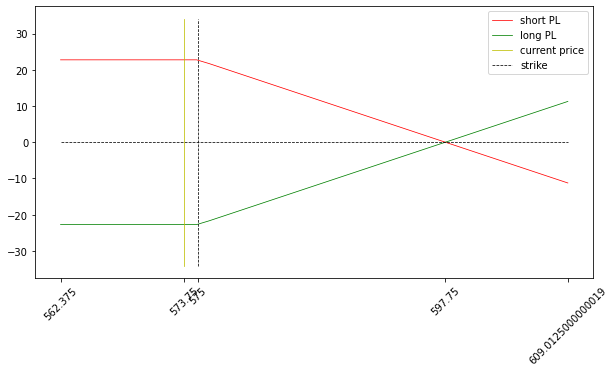

In [11]:
curr = 573.75
strike = 575
premium = 22.75
cash_multiplier = 50
stl_price = 600
long, short, breakeven, delta, delta_beven, cash_value, long_profit, short_profit = call_pl(strike, 
                                                                                            premium, 
                                                                                            curr, 
                                                                                            cash_multiplier, 
                                                                                            stl_price, 
                                                                                            plot=True, 
                                                                                            figsize=(10,5))
print(long_profit, short_profit)
# print(long)
# print(delta)
# print(delta_beven)
# print(cash_value)